In [91]:
!pip install spotipy 

In [298]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.offline as pyo

## Paso 1: Acceder a la API de Spotify

Lo primero que se debe realizar es obtener las credenciales para acceder a la API de [Spotify](https://open.spotify.com/) que nos permitirá extraer data de la plataforma. Para ello es necesario crearse una cuenta en [Spotify for Developers](https://developer.spotify.com/dashboard/) y darle al botón verde "Create an app". Luego se le da click a la app creada y se usarán las credenciales como en la foto:
<br>
<img src="Spotify_Credentials.png">

In [93]:
client_id = "89fa45fdca064f10b8e13e5d6bf0a8eb" # Cambiar por tu Client ID
client_secret = "7999b6ae86ea410ba2428a55b2d7e9bg" # Cambiar por tu Client Secret

# Authentication - sin user
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

## Paso 2: Obtener canciones (tracks) y artistas

#### Paso 2.1: Obtener información de las canciones (tracks)

In [94]:
nombre_artista = []
id_artista = []
nombre_cancion = []
id_cancion = []
popularidad_cancion = []
for i in range(0,1000,50):
    track_results = sp.search(q='year:2022', type='track', limit=50,offset=i)
    for i, c in enumerate(track_results['tracks']['items']):
        nombre_artista.append(c['artists'][0]['name'])
        id_artista.append(c['artists'][0]['id'])
        nombre_cancion.append(c['name'])
        id_cancion.append(c['id'])
        popularidad_cancion.append(c['popularity'])

In [95]:
track_df = pd.DataFrame({'nombre_artista':nombre_artista, 'nombre_cancion':nombre_cancion, 'id_cancion':id_cancion, 'popularidad_cancion':popularidad_cancion, 'id_artista':id_artista})
print(track_df.shape)
track_df.head()

(1000, 5)


,nombre_artista,nombre_cancion,id_cancion,popularidad_cancion,id_artista
0,Bad Bunny,Me Porto Bonito,6Sq7ltF9Qa7SNFBsV5Cogx,99,4q3ewBCX7sLwd24euuV69X
1,Ish Kevin,My Year (2022),4eHkG6yWQ4pD0zqVkV0R5a,20,27rjDVGfZG4eorQwrZt2ZD
2,Calvin Harris,Potion (with Dua Lipa & Young Thug),7fYRg3CEbk6rNCuzNzMT06,85,7CajNmpbOovFoOoasH2HaY
3,Alesso,Years,4vxlZ2IsrBvzipRb8qQmwT,0,4AVFqumd2ogHFlRbKIjp1t
4,Joji,Glimpse of Us,6xGruZOHLs39ZbVccQTuPZ,97,3MZsBdqDrRTJihTHQrO6Dq


#### Paso 2.2: Agregar información sobre los artistas que interpretan las canciones (tracks)

In [96]:
popularidad_artista = []
generos_artista = []
seguidores_artista = []
for id_a in track_df.id_artista:
  artista = sp.artist(id_a)
  popularidad_artista.append(artista['popularity'])
  generos_artista.append(artista['genres'])
  seguidores_artista.append(artista['followers']['total'])

In [97]:
track_df = track_df.assign(popularidad_artista=popularidad_artista, generos_artista=generos_artista, seguidores_artista=seguidores_artista)
track_df.head()

,nombre_artista,nombre_cancion,id_cancion,popularidad_cancion,id_artista,popularidad_artista,generos_artista,seguidores_artista
0,Bad Bunny,Me Porto Bonito,6Sq7ltF9Qa7SNFBsV5Cogx,99,4q3ewBCX7sLwd24euuV69X,100,"[latin, reggaeton, trap latino]",53594565
1,Ish Kevin,My Year (2022),4eHkG6yWQ4pD0zqVkV0R5a,20,27rjDVGfZG4eorQwrZt2ZD,23,[rwandan hip hop],7464
2,Calvin Harris,Potion (with Dua Lipa & Young Thug),7fYRg3CEbk6rNCuzNzMT06,85,7CajNmpbOovFoOoasH2HaY,86,"[dance pop, edm, electro house, house, pop, pr...",22978240
3,Alesso,Years,4vxlZ2IsrBvzipRb8qQmwT,0,4AVFqumd2ogHFlRbKIjp1t,76,"[dance pop, edm, electro house, pop, pop dance...",3845941
4,Joji,Glimpse of Us,6xGruZOHLs39ZbVccQTuPZ,97,3MZsBdqDrRTJihTHQrO6Dq,85,[viral pop],6725935


## Paso 3: Obtener variables numéricas de las canciones (tracks)

In [99]:
variables_cancion = []
for id_c in track_df['id_cancion']:
  af = sp.audio_features(id_c)
  variables_cancion.append(af)

In [100]:
print(variables_cancion[0][0].keys())

dict_keys(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature'])


In [101]:
tf_df = pd.DataFrame(columns = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature'])

In [102]:
for variables in variables_cancion:
  for var in variables:
    tf_df = tf_df.append(var, ignore_index=True)

In [103]:
tf_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.911,0.712,1,-5.105,0,0.0817,0.09010,0.000027,0.0933,0.425,92.005,audio_features,6Sq7ltF9Qa7SNFBsV5Cogx,spotify:track:6Sq7ltF9Qa7SNFBsV5Cogx,https://api.spotify.com/v1/tracks/6Sq7ltF9Qa7S...,https://api.spotify.com/v1/audio-analysis/6Sq7...,178567,4
1,0.521,0.683,5,-6.240,0,0.5010,0.15900,0.000000,0.1870,0.737,139.439,audio_features,4eHkG6yWQ4pD0zqVkV0R5a,spotify:track:4eHkG6yWQ4pD0zqVkV0R5a,https://api.spotify.com/v1/tracks/4eHkG6yWQ4pD...,https://api.spotify.com/v1/audio-analysis/4eHk...,161808,3
2,0.824,0.697,11,-4.869,0,0.0473,0.15800,0.000041,0.0770,0.757,99.988,audio_features,7fYRg3CEbk6rNCuzNzMT06,spotify:track:7fYRg3CEbk6rNCuzNzMT06,https://api.spotify.com/v1/tracks/7fYRg3CEbk6r...,https://api.spotify.com/v1/audio-analysis/7fYR...,214460,4
3,0.362,0.858,2,-3.920,1,0.0743,0.00211,0.000001,0.2500,0.282,127.891,audio_features,4vxlZ2IsrBvzipRb8qQmwT,spotify:track:4vxlZ2IsrBvzipRb8qQmwT,https://api.spotify.com/v1/tracks/4vxlZ2IsrBvz...,https://api.spotify.com/v1/audio-analysis/4vxl...,196347,4
4,0.440,0.317,8,-9.258,1,0.0531,0.89100,0.000005,0.1410,0.268,169.914,audio_features,6xGruZOHLs39ZbVccQTuPZ,spotify:track:6xGruZOHLs39ZbVccQTuPZ,https://api.spotify.com/v1/tracks/6xGruZOHLs39...,https://api.spotify.com/v1/audio-analysis/6xGr...,233456,3


In [104]:
tf_df['duration_ms'] = pd.to_numeric(tf_df['duration_ms'])
tf_df = tf_df.drop(columns=['key','mode','type', 'uri','track_href','analysis_url'])
print(track_df.info())
print(tf_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   nombre_artista       1000 non-null   object
 1   nombre_cancion       1000 non-null   object
 2   id_cancion           1000 non-null   object
 3   popularidad_cancion  1000 non-null   int64 
 4   id_artista           1000 non-null   object
 5   popularidad_artista  1000 non-null   int64 
 6   generos_artista      1000 non-null   object
 7   seguidores_artista   1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      999 non-null    float64
 1   energy            999 non-null    float64
 2   loudness          999 non-null    float64
 3   spee

In [105]:
track_df['nombre_artista'] = track_df['nombre_artista'].astype("string")
track_df['nombre_cancion'] = track_df['nombre_cancion'].astype("string")
track_df['id_cancion'] = track_df['id_cancion'].astype("string")
track_df['id_artista'] = track_df['id_artista'].astype("string")
tf_df['instrumentalness'] = pd.to_numeric(tf_df['instrumentalness'])
tf_df['time_signature'] = tf_df['time_signature'].astype("category")
print(track_df.info())
print(tf_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   nombre_artista       1000 non-null   string
 1   nombre_cancion       1000 non-null   string
 2   id_cancion           1000 non-null   string
 3   popularidad_cancion  1000 non-null   int64 
 4   id_artista           1000 non-null   string
 5   popularidad_artista  1000 non-null   int64 
 6   generos_artista      1000 non-null   object
 7   seguidores_artista   1000 non-null   int64 
dtypes: int64(3), object(1), string(4)
memory usage: 62.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   danceability      999 non-null    float64 
 1   energy            999 non-null    float64 
 2   loudness          999 non-null    fl

## Paso 4: Obtener las canciones, artistas y géneros más populares

#### Paso 4.1: Obtener canciones más populares

In [233]:
top_canciones = track_df.sort_values(by=['popularidad_cancion'], ascending=False)[['nombre_cancion', 'nombre_artista', 'popularidad_cancion']].head(20)
top_canciones.index = np.arange(1, len(top_canciones)+1)
top_canciones

,nombre_cancion,nombre_artista,popularidad_cancion
1,"Quevedo: Bzrp Music Sessions, Vol. 52",Bizarrap,100
2,Me Porto Bonito,Bad Bunny,99
3,Tití Me Preguntó,Bad Bunny,98
4,Glimpse of Us,Joji,97
5,Ojitos Lindos,Bad Bunny,96
6,As It Was,Harry Styles,96
7,Efecto,Bad Bunny,96
8,Moscow Mule,Bad Bunny,95
9,Left and Right (Feat. Jung Kook of BTS),Charlie Puth,94
10,PROVENZA,KAROL G,94


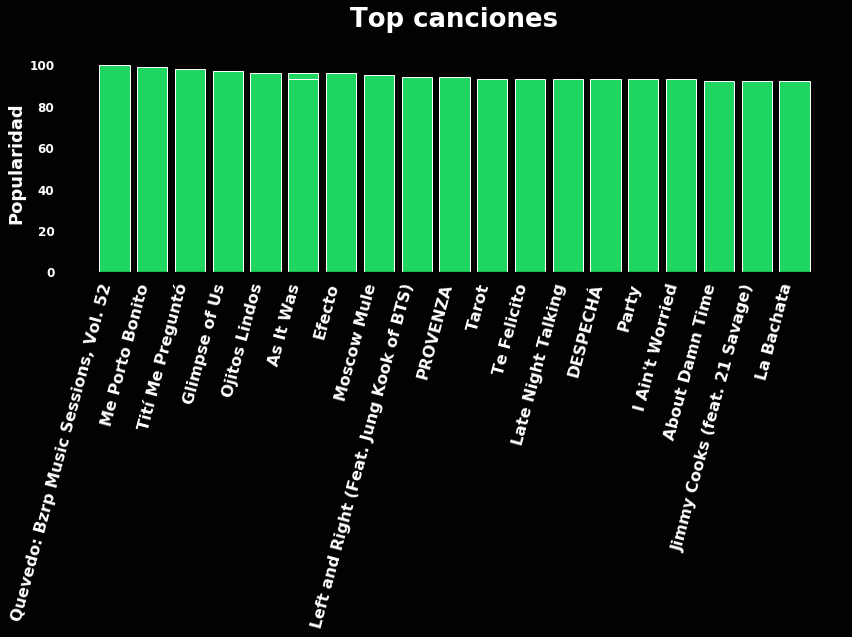

In [241]:
plt.figure(figsize=(14,4), facecolor='#020202') 
ax = plt.axes() 
ax.bar(top_canciones['nombre_cancion'], top_canciones['popularidad_cancion'], color='#1ED660')
ax.set_ylabel("Popularidad", {'fontname':'Open Sans'}, size = 18, color='white', weight='bold')
ax.set_title("Top canciones", {'fontname':'Open Sans'}, size = 26, color='white', weight='bold', x=0.5, y=1.1)
ax.set_facecolor("#020202")
ax.grid(False)
plt.setp(ax.get_xticklabels(), fontname='Open Sans', rotation=75, ha="right", color='white', size=16, weight='bold')
plt.setp(ax.get_yticklabels(), fontname='Open Sans', color='white', size=12, weight='bold')
plt.setp(ax.spines.values(), color='#020202')
plt.show()

#### Paso 4.2: Obtener artistas más populares según número de seguidores

In [230]:
top_artistas = pd.DataFrame(track_df.sort_values(by=['seguidores_artista'], ascending=False)[['nombre_artista','seguidores_artista','popularidad_artista','generos_artista']])
top_artistas = top_artistas.astype(str).drop_duplicates().head(20)
top_artistas['seguidores_artista'] = top_artistas['seguidores_artista'].astype('int')
top_artistas.index = np.arange(1, len(top_artistas)+1)
top_artistas

,nombre_artista,seguidores_artista,popularidad_artista,generos_artista
1,Ed Sheeran,101392988,90,"['pop', 'uk pop']"
2,Billie Eilish,67932764,88,"['art pop', 'electropop', 'pop']"
3,Drake,66351340,95,"['canadian hip hop', 'canadian pop', 'hip hop'..."
4,Eminem,58476938,89,"['detroit hip hop', 'hip hop', 'rap']"
5,Taylor Swift,57072868,93,['pop']
6,BTS,53686072,91,"['k-pop', 'k-pop boy group']"
7,Bad Bunny,53594565,100,"['latin', 'reggaeton', 'trap latino']"
8,The Weeknd,48795721,93,"['canadian contemporary r&b', 'canadian pop', ..."
9,Imagine Dragons,41941340,88,"['modern rock', 'rock']"
10,Shawn Mendes,38952810,83,"['canadian pop', 'pop', 'viral pop']"


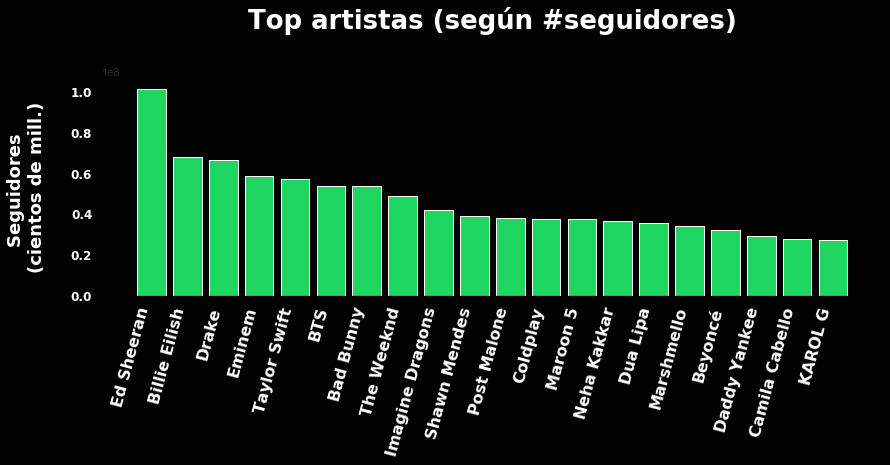

In [247]:
plt.figure(figsize=(14,4), facecolor='#020202') 
ax = plt.axes() 
ax.bar(top_artistas['nombre_artista'], top_artistas['seguidores_artista'], color='#1ED660')
ax.set_ylabel("Seguidores \n(cientos de mill.)", {'fontname':'Open Sans'}, size = 18, color='white', weight='bold')
ax.set_title("Top artistas (según #seguidores)", {'fontname':'Open Sans'}, size = 26, color='white', weight='bold', x=0.5, y=1.2)
ax.set_facecolor("#020202")
ax.grid(False)
plt.setp(ax.get_xticklabels(), fontname='Open Sans', rotation=75, ha="right", color='white', size=16, weight='bold')
plt.setp(ax.get_yticklabels(), fontname='Open Sans', color='white', size=12, weight='bold')
plt.setp(ax.spines.values(), color='#020202')
plt.show()

#### Paso 4.3: Obtener artistas más populares según popularidad

In [248]:
top_artistas = pd.DataFrame(track_df.sort_values(by=['popularidad_artista'], ascending=False)[['nombre_artista','seguidores_artista','popularidad_artista','generos_artista']])
top_artistas = top_artistas.astype(str).drop_duplicates().head(20)
top_artistas['popularidad_artista'] = top_artistas['popularidad_artista'].astype('int')
top_artistas.index = np.arange(1, len(top_artistas)+1)
top_artistas

,nombre_artista,seguidores_artista,popularidad_artista,generos_artista
1,Bad Bunny,53594565,100,"['latin', 'reggaeton', 'trap latino']"
2,Drake,66351340,95,"['canadian hip hop', 'canadian pop', 'hip hop'..."
3,Taylor Swift,57072868,93,['pop']
4,The Weeknd,48795721,93,"['canadian contemporary r&b', 'canadian pop', ..."
5,Harry Styles,22711363,91,['pop']
6,BTS,53686072,91,"['k-pop', 'k-pop boy group']"
7,Kanye West,18027900,90,"['chicago rap', 'rap']"
8,Ed Sheeran,101392988,90,"['pop', 'uk pop']"
9,Eminem,58476938,89,"['detroit hip hop', 'hip hop', 'rap']"
10,Beyoncé,32091211,89,"['dance pop', 'pop', 'r&b']"


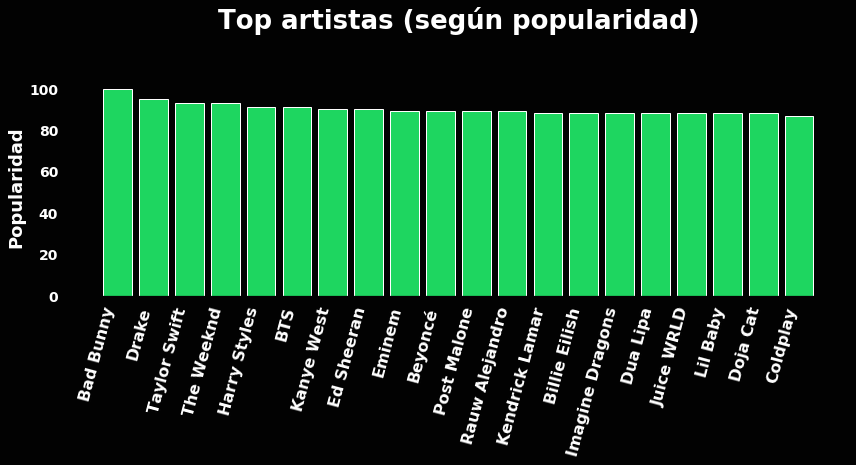

In [259]:
plt.figure(figsize=(14,4), facecolor='#020202') 
ax = plt.axes() 
ax.bar(top_artistas['nombre_artista'], top_artistas['popularidad_artista'], color='#1ED660')
ax.set_ylabel("Popularidad", {'fontname':'Open Sans'}, size = 18, color='white', weight='bold')
ax.set_title("Top artistas (según popularidad)", {'fontname':'Open Sans'}, size = 26, color='white', weight='bold', x=0.5, y=1.2)
ax.set_facecolor("#020202")
ax.grid(False)
plt.setp(ax.get_xticklabels(), fontname='Open Sans', rotation=75, ha="right", color='white', size=16, weight='bold')
plt.setp(ax.get_yticklabels(), fontname='Open Sans', color='white', size=14, weight='bold')
plt.setp(ax.spines.values(), color='#020202')
plt.show()

#### Paso 4.4: Obtener los géneros más populares

In [257]:
top_generos = pd.Series([x for _list in track_df['generos_artista'] for x in _list]).value_counts().head(20).to_frame().reset_index()
top_generos = top_generos.rename(columns = {'index':'generos', 0:'frecuencia'})
top_generos.index = np.arange(1, len(top_generos)+1)
top_generos

,generos,frecuencia
1,pop,161
2,rap,133
3,workout product,101
4,hip hop,99
5,dance pop,80
6,trap,65
7,detroit hip hop,52
8,reggaeton,40
9,latin,40
10,trap latino,39


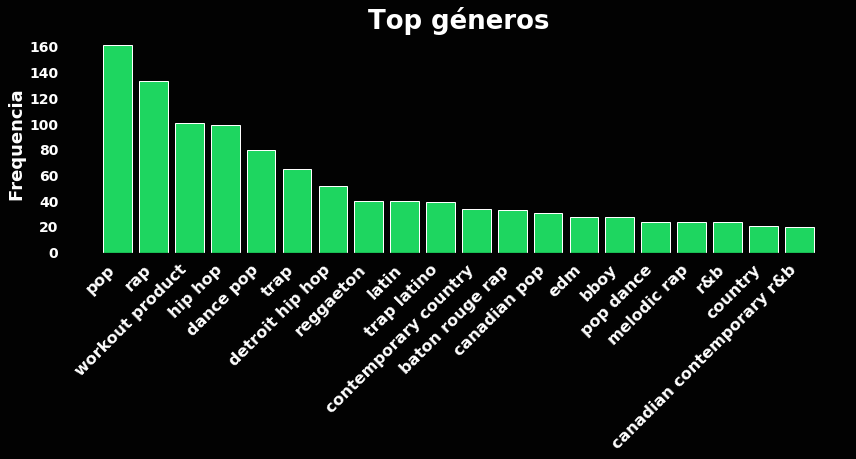

In [258]:
plt.figure(figsize=(14,4), facecolor='#020202') 
ax = plt.axes() 
ax.bar(top_generos['generos'], top_generos['frecuencia'], color='#1ED660')
ax.set_ylabel("Frequencia", {'fontname':'Open Sans'}, size = 18, color='white', weight='bold')
ax.set_title("Top géneros", {'fontname':'Open Sans'}, size = 26, color='white', weight='bold', x=0.5, y=1)
ax.set_facecolor("#020202")
ax.grid(False)
plt.setp(ax.get_xticklabels(), fontname='Open Sans', rotation=45, ha="right", color='white', size=16, weight='bold')
plt.setp(ax.get_yticklabels(), fontname='Open Sans', color='white', size=14, weight='bold')
plt.setp(ax.spines.values(), color='#020202')
plt.show()

## Paso 5: Obtener artistas y canciones más populares (por seguidores) por género más popular

#### Paso 5.1: Obtener artistas más populares (por seguidores) por género más popular

In [114]:
by_artista_pop = pd.DataFrame(track_df.sort_values(by=['popularidad_artista'],ascending=False)[['popularidad_artista','nombre_artista','generos_artista','id_artista']])
by_artista_pop.astype(str).drop_duplicates().head(20)
by_artista_pop
top_artistas_por_genero = []
for genero in top_generos['generos'].to_list():
  for index, row in by_artista_pop.iterrows():
    if genero in row['generos_artista']:
      top_artistas_por_genero.append({'nombre_artista':row['nombre_artista'], 'popularidad_artista':row['popularidad_artista'],'generos':genero})
      break
top_artistas_por_genero = pd.json_normalize(top_artistas_por_genero)
top_artistas_por_genero = top_artistas_por_genero.merge(top_generos, on='generos', how='left')
top_artistas_por_genero

,nombre_artista,popularidad_artista,generos,frecuencia
0,Taylor Swift,93,pop,161
1,Drake,95,rap,133
2,Workout Music Tv,50,workout product,101
3,Drake,95,hip hop,99
4,Beyoncé,89,dance pop,80
5,Lil Baby,88,trap,65
6,Eminem,89,detroit hip hop,52
7,Bad Bunny,100,reggaeton,40
8,Bad Bunny,100,latin,40
9,Bad Bunny,100,trap latino,39


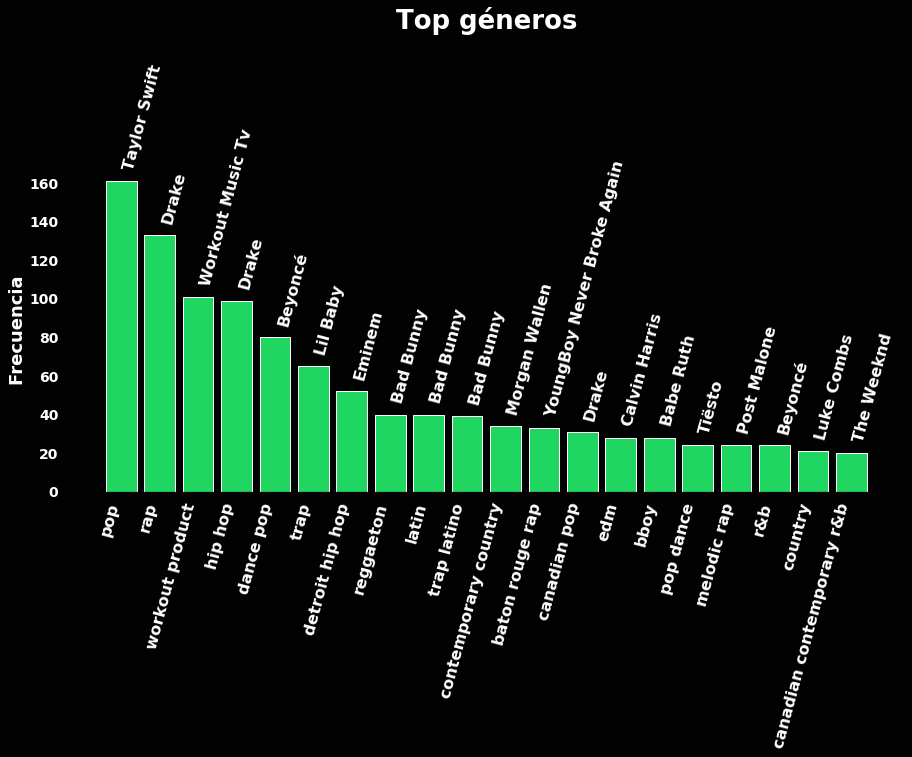

In [254]:
plt.figure(figsize=(15,6), facecolor='#020202') 
ax = plt.axes() 
ax.bar(top_artistas_por_genero['generos'], top_artistas_por_genero['frecuencia'], color='#1ED660')
ax.set_ylabel("Frecuencia", {'fontname':'Open Sans'}, size = 18, color='white', weight='bold')
ax.set_title("Top géneros", {'fontname':'Open Sans'}, size = 26, color='white', weight='bold', x=0.5, y=1.4)
ax.set_facecolor("#020202")
ax.grid(False)
plt.setp(ax.get_xticklabels(), fontname='Open Sans', rotation=75, ha="right", color='white', size=16, weight='bold')
plt.setp(ax.get_yticklabels(), fontname='Open Sans', color='white', size=14, weight='bold')
plt.setp(ax.spines.values(), color='#020202')

for rect, label in zip(ax.patches, top_artistas_por_genero['nombre_artista'].to_list()):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, label, ha="left", va="bottom", fontname='Open Sans', color='white', size=16, rotation=75, weight='bold')
plt.show()

#### Paso 5.2: Obtener canciones más populares (por seguidores) por género más popular

In [116]:
by_track_pop = pd.DataFrame(track_df.sort_values(by=['popularidad_cancion'],ascending=False)[['popularidad_cancion','nombre_cancion','nombre_artista','generos_artista','id_cancion']])
top_canciones_por_genero = []
for genre in top_generos['generos'].to_list():
  for index, row in by_track_pop.iterrows():
    if genre in row['generos_artista']:
      top_canciones_por_genero.append({'nombre_cancion':row['nombre_cancion'], 'popularidad_cancion':row['popularidad_cancion'], 'generos':genre})
      break
top_canciones_por_genero = pd.json_normalize(top_canciones_por_genero)
top_canciones_por_genero = top_canciones_por_genero.merge(top_generos, on='generos', how='left')
top_canciones_por_genero

,nombre_cancion,popularidad_cancion,generos,frecuencia
0,As It Was,96,pop,161
1,Jimmy Cooks (feat. 21 Savage),92,rap,133
2,Cold Heart (Workout Mix),9,workout product,101
3,Jimmy Cooks (feat. 21 Savage),92,hip hop,99
4,Left and Right (Feat. Jung Kook of BTS),94,dance pop,80
5,WAIT FOR U (feat. Drake & Tems),89,trap,65
6,Is This Love ('09) (feat. 50 Cent),70,detroit hip hop,52
7,Me Porto Bonito,99,reggaeton,40
8,Me Porto Bonito,99,latin,40
9,Me Porto Bonito,99,trap latino,39


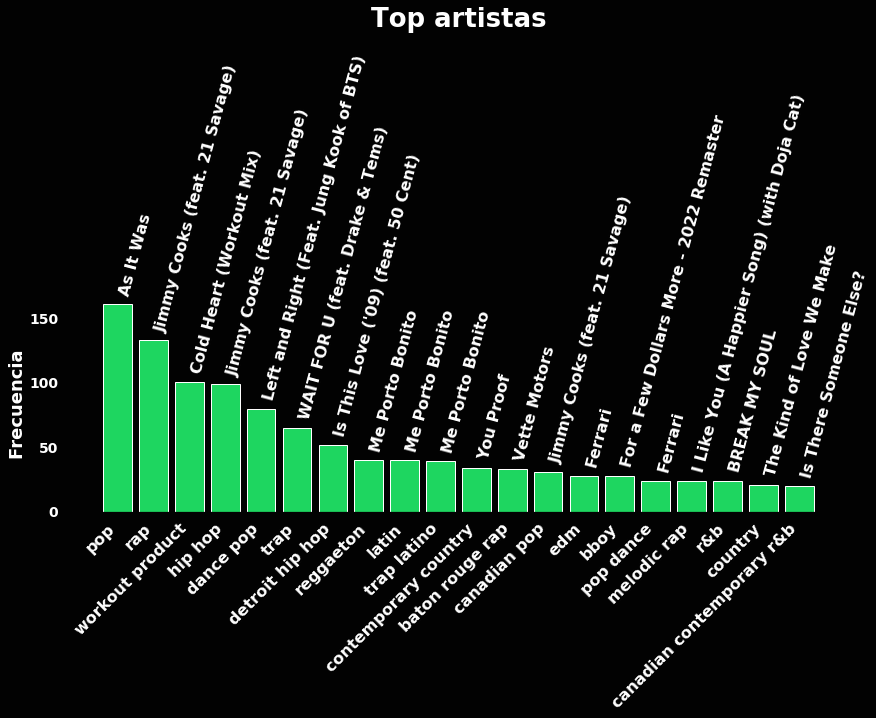

In [345]:
plt.figure(figsize=(14,4), facecolor='#020202') 
ax = plt.axes() 
ax.bar(top_canciones_por_genero['generos'], top_canciones_por_genero['frecuencia'], color='#1ED660')
ax.set_ylabel("Frecuencia", {'fontname':'Open Sans'}, size = 18, color='white', weight='bold')
ax.set_title("Top artistas", {'fontname':'Open Sans'}, size = 26, color='white', weight='bold', x=0.5, y=2.2)
ax.set_facecolor("#020202")
ax.grid(False)
plt.setp(ax.get_xticklabels(), fontname='Open Sans', rotation=45, ha="right", color='white', size=16, weight='bold')
plt.setp(ax.get_yticklabels(), fontname='Open Sans', color='white', size=14, weight='bold')
plt.setp(ax.spines.values(), color='#020202')

for rect, label in zip(ax.patches, top_canciones_por_genero['nombre_cancion'].to_list()):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, label, ha="left", va="bottom", fontname='Open Sans', color='white', size=16, rotation=75, weight='bold')

plt.show()

## Paso 6: Análisis de las variables de las canciones

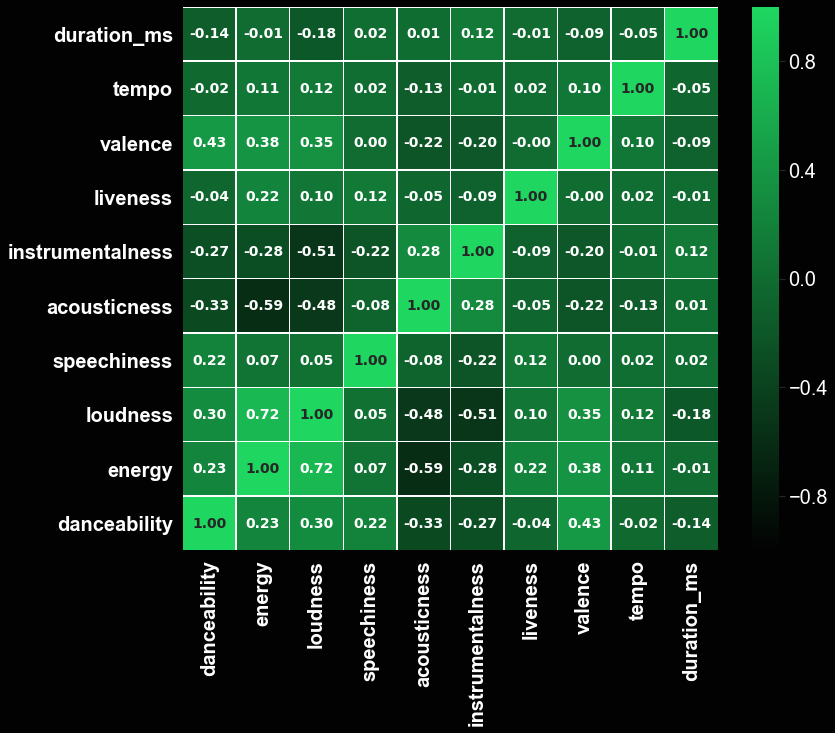

In [379]:
ax =sns.heatmap(tf_df.corr(), cmap=cmap, vmin=-1, vmax=1, annot=True, fmt="0.2f", linewidths=.5, annot_kws={'fontsize': 14,
                                                                                                           'fontweight': 'bold',
                                                                                                           'fontfamily': 'open sans'})
sns.set(rc = {'axes.facecolor':'#020202','figure.facecolor':'#020202'}, font_scale=1.8)
cmap = LinearSegmentedColormap.from_list('Spotify', ['#020202', '#1ED660'])
ax.set_ylim([0,10])
ax.set(facecolor='black')
ax.figure.axes[1].tick_params(axis="y", labelsize=20, labelcolor='white')

for label1, label2 in zip(ax.get_xticklabels(), ax.get_yticklabels()):
    label1.set_size(20)
    label1.set_weight("bold")
    label1.set_color("white")
    label2.set_size(20)
    label2.set_weight("bold")
    label2.set_color("white")
plt.show()

## Paso 7: Radar chart usando las variables de las canciones

In [120]:
# Crear un dataframe con las variables de las top 100 canciones
var_canc_cols = ['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence']
top_100_var = pd.DataFrame(columns=var_canc_cols)
for i, track in by_track_pop[:100].iterrows():
  variables = tf_df[tf_df['id'] == track['id_cancion']]
  top_100_var = top_100_var.append(variables, ignore_index=True)
top_100_var = top_100_var[var_canc_cols]

mean_vals = pd.DataFrame(columns=var_canc_cols)
mean_vals = mean_vals.append(top_100_var.mean(), ignore_index=True)
mean_vals = mean_vals.append(tf_df[var_canc_cols].mean(), ignore_index=True)
mean_vals

,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence
0,0.72349,0.657570,0.101348,0.236622,0.001576,0.181213,0.547861
1,0.64838,0.650622,0.122490,0.233833,0.142300,0.189100,0.512081


In [390]:
fig = go.Figure(data=[go.Scatterpolar(r=mean_vals.iloc[0], theta=var_canc_cols, fill='toself', name='Top 100', line_color='#FFFFFF', fillcolor='rgba(255,255,255,0.9)'),
                      go.Scatterpolar(r=mean_vals.iloc[1], theta=var_canc_cols, fill='toself', name='Todas', line_color='rgb(30,214,96)', fillcolor='rgba(30,214,96,0.7)')],
                layout=go.Layout(title=go.layout.Title(text='Comparación de características'),
                                 polar={'radialaxis': {'visible': True}},
                                 showlegend=True, plot_bgcolor='#020202', paper_bgcolor='#020202'))
fig.update_layout(title=dict(text='Comparación de características',
                             font=dict(family="sans-serif", 
                                       size = 18,
                                       color='#FFFFFF')),
                 legend=dict(font=dict(size=20, color='#FFFFFF')))
fig.update_xaxes(title_font_color='#FFFFFF')
fig.update_yaxes(title_font_color='#FFFFFF') 
fig.update_polars(angularaxis_color='#FFFFFF', angularaxis_tickfont_size=20, angularaxis_linecolor='#1ED660', angularaxis_linewidth=2, angularaxis_gridcolor='#1ED660', angularaxis_tickcolor='#1DB954',
                 bgcolor='rgba(25,20,20,1)', radialaxis_gridcolor='#1ED660')
fig.show()